# Project #3
## Foundations of Machine Learning

The purpose of this project is to build models to predict the outcome of the 2024 presidential election in Virginia and provide quantitative information about the precision of the prediction.
  
The data include:
  
  - `voting_VA.csv`: Voting data for presidential elections for Virginia from 2000 to 2020
  - `nhgis_county_data`: A folder containing many county-level summary stats for every county in the U.S. This is the most complete county-level data I could find. If you go to the IPUMS NHGIS web site, you can see what else is available (there are hundreds of variables, and I chose a large number of obvious ones; perhaps some useful ones escaped my attention). For standard IPUMS microdata, the county is not available for privacy reasons.
  - `county_adjacencies.csv`: I looked up the neighbors, districts, FIPS county identifiers, and populations in 2022 for all counties and cities in Virginia.
  - At [https://vgin.vdem.virginia.gov/datasets/777890ecdb634d18a02eec604db522c6/about] there is a shapefile for making choropleth plots called "Shapefile Download (Clipped to VIMS shoreline)"
  -  I put together a starter notebook called `va_voting.ipynb` that shows how to combine these files and make nice maps
 
You can use whatever additional data you want to create a predictive algorithm for outcomes, based on the `voting_VA.csv` and `nhgis_county_data` data or other sources you think would be useful. You can focus on Virginia data, but in principle, you could use data from the entire country. Since you only have five observations for each county on its own in Virginia, you can, in principle, use the additional data about county composition or data from other states to build richer and more powerful predictive models than just the sample average for each county (e.g 3 observations of `D` winning and 2 of `R` winning implies a probability 3/5 of `D` winning). You could also gather and use data about past candidates to see if there are county-candidate interaction effects that improve your model's performance. Indeed, 2024 might be a Biden-Trump rematch, in which case past data might be extremely relevant.
    
## Paper format

The format of the paper should be:

- Summary: A one paragraph description of the question, methods, and results (about 350 words).
- Data: One to two pages discussing the data and key variables, and any challenges in reading, cleaning, and preparing them for analysis.
- Results: Two to five pages providing visualizations, statistics, tables, a discussion of your methodology, and a presentation of your main results. In particular, how are you approaching the prediction problem? How confident are you about your assessments that counties will support one party or the other?
- Conclusion: One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project.
- Appendix: If you have a significant number of additional plots or table that you feel are essential to the project, you can put any amount of extra content at the end and reference it from the body of the paper.

Submit your work in your group's GitHub repo.

## Group Work and Submission

Each group will submit their work in a GitHub repo. The repo can be managed by a group member or arranged by github.com/DS3001.

Half of each student's grade is based on their commits to the repo. Each student is expected to do something
specific that contributes to the overall project outcome. Since commits are recorded explicitly by Git/GitHub,
this is observable. A student can contribute by cleaning data, creating visualizations, or writing about results,
but everyone has to do something substantial. A student's work doesn't need to make it into the final report
to be valuable and substantial, and fulfill the requirement to make a contribution to the project.

The other half of each student's grade is based on the report. Groups will work together on combining
results and writing up findings in a Jupyter notebook, using code chunks to execute Python commands and
markdown chunks to structure the paper and provide exposition. The notebook should run on Colab or
Rivana from beginning to end without any errors.

## Criteria

The project is graded based on four criteria:

- Project Concept: What is the strategy for building and testing the group's predictive models? How are the models embedded in the decision problem of gerrymandering Virginia?  
- Wrangling, EDA, and Visualization: How are are missing values handled? For variables with large numbers of missing values, to what extent do the data and documentation provide an explanation for the missing data? If multiple data sources are used, how are the data merged? For the main variables in the analysis, are the relevant data summarized and visualized through a histogram or kernel density plot where appropriate? Are basic quantitative features of the data addressed and explained? How are outliers characterized and addressed? 
- Analysis: What are the groups' main findings? Do the tables, plots, and statistics support the conclusions? If the gerrymandering strategy succeeds, what are the results and how extreme can the map be drawn for each side? If the gerrymandering strategy fails, is there a thoughtful discussion about the challenges and limitations?
- Replication/Documentation: Is the code appropriately commented? Can the main results be replicated from the code and original data files? Are significant choices noted and explained?

Each of the four criteria are equally weighted (25 points out of 100).


## Summary

This project focused on predicting election results for the state of Virginia using a random forest model.

In [5]:
# RESOURCES
# https://stackoverflow.com/questions/75956209/error-dataframe-object-has-no-attribute-append
# https://flexiple.com/python/python-uppercase
# https://medium.com/@geencay/predicting-president-election-by-bootstrapping-in-python-a1bd8fa122cc
# https://www.geeksforgeeks.org/random-forest-regression-in-python/
# https://towardsdatascience.com/how-i-predicted-the-election-result-with-simple-linear-regression-e54c6c196239
# https://github.com/CezaryKlimczuk/PresidentialElection2020/blob/master/Election%20Analysis.ipynb
# https://colab.research.google.com/drive/1Z1aiXravQxrUKJbk1ciTy0DZ_yhBopZS?usp=sharing
# https://colab.research.google.com/drive/1Z1aiXravQxrUKJbk1ciTy0DZ_yhBopZS?usp=sharing
# https://medium.com/@lfoster49203/predicting-election-outcomes-with-machine-learning-a-tutorial-in-python-4c309904e0e1
# https://libguides.princeton.edu/elections
# https://medium.com/@roiyeho/random-forests-98892261dc49
# https://medium.com/@mrmaster907/introduction-random-forest-classification-by-example-6983d95c7b91
# https://stackoverflow.com/questions/24109779/running-get-dummies-on-several-dataframe-columns
# https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
# https://towardsdatascience.com/random-forest-ca80e56224c1
# https://electionlab.mit.edu/data
# https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ
# https://saturncloud.io/blog/how-to-remove-decimal-points-in-pandas-a-guide-for-data-scientists/#:~:text=Method%201%3A%20Using%20the%20round()%20Function,-The%20simplest%20way&text=As%20you%20can%20see%2C%20the,col1'%20column%20of%20the%20dataframe.
# https://www.aporia.com/resources/how-to/select-rows-in-dataframe-from-list/#:~:text=and%20PySpark%20DataFrames.-,Pandas,conditions%20inside%20a%20Python%20list.&text=If%20you%20are%20interested%20in,set%20the%20condition%20as%20False.
# https://pandas.pydata.org/docs/user_guide/merging.html

In [6]:
# DATA
# https://www.census.gov/programs-surveys/popest/technical-documentation/research/evaluation-estimates/2020-evaluation-estimates/2010s-counties-total.html
# https://www.census.gov/data/datasets/time-series/demo/popest/intercensal-2000-2010-counties.html

In [7]:
# Import libraries
import pandas as pd
vdf = pd.read_csv('./data/voting_VA.csv') # Load historical voting data
vdf = vdf.drop(columns=['Unnamed: 0', 'state_po'])
vdf

,year,state,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,VIRGINIA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,2000,VIRGINIA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,2000,VIRGINIA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,2000,VIRGINIA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,2000,VIRGINIA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...
3731,2020,VIRGINIA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,24,12113,20220315,ELECTION DAY
3732,2020,VIRGINIA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,0,12113,20220315,PROVISIONAL
3733,2020,VIRGINIA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2825,12113,20220315,ABSENTEE
3734,2020,VIRGINIA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,20220315,ELECTION DAY


In [8]:
print(vdf['mode'].unique())
print(vdf.loc[vdf['mode'] == 'ELECTION DAY']['year'].unique())
print(vdf.loc[vdf['mode'] == 'TOTAL']['year'].unique())

# what this means is that previous years only give the total number of votes per candidate...only in 2020 is the data split up into other categories and has no total

['TOTAL' 'ABSENTEE' 'ELECTION DAY' 'PROVISIONAL']
[2020]
[2000 2004 2008 2012 2016]


In [9]:
print(vdf['office'].unique())
vdf = vdf.drop(columns=['office']) # don't need this column since every value is the same

['US PRESIDENT']


In [10]:
vdf

,year,state,county_name,county_fips,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,VIRGINIA,ACCOMACK,51001,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,2000,VIRGINIA,ACCOMACK,51001,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,2000,VIRGINIA,ACCOMACK,51001,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,2000,VIRGINIA,ACCOMACK,51001,OTHER,OTHER,261,11925,20220315,TOTAL
4,2000,VIRGINIA,ALBEMARLE,51003,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...
3731,2020,VIRGINIA,WINCHESTER CITY,51840,OTHER,OTHER,24,12113,20220315,ELECTION DAY
3732,2020,VIRGINIA,WINCHESTER CITY,51840,OTHER,OTHER,0,12113,20220315,PROVISIONAL
3733,2020,VIRGINIA,WINCHESTER CITY,51840,DONALD J TRUMP,REPUBLICAN,2825,12113,20220315,ABSENTEE
3734,2020,VIRGINIA,WINCHESTER CITY,51840,DONALD J TRUMP,REPUBLICAN,2370,12113,20220315,ELECTION DAY


In [11]:
vdf_2020 = vdf.loc[vdf['year'] == 2020]
vdf_2020 = vdf_2020.dropna()
vdf_2020

,year,state,county_name,county_fips,candidate,party,candidatevotes,totalvotes,version,mode
2144,2020,VIRGINIA,ACCOMACK,51001,JOSEPH R BIDEN JR,DEMOCRAT,5495,16962,20220315,ABSENTEE
2145,2020,VIRGINIA,ACCOMACK,51001,JOSEPH R BIDEN JR,DEMOCRAT,2072,16962,20220315,ELECTION DAY
2146,2020,VIRGINIA,ACCOMACK,51001,JOSEPH R BIDEN JR,DEMOCRAT,11,16962,20220315,PROVISIONAL
2147,2020,VIRGINIA,ACCOMACK,51001,JO JORGENSEN,LIBERTARIAN,66,16962,20220315,ABSENTEE
2148,2020,VIRGINIA,ACCOMACK,51001,JO JORGENSEN,LIBERTARIAN,122,16962,20220315,ELECTION DAY
...,...,...,...,...,...,...,...,...,...,...
3731,2020,VIRGINIA,WINCHESTER CITY,51840,OTHER,OTHER,24,12113,20220315,ELECTION DAY
3732,2020,VIRGINIA,WINCHESTER CITY,51840,OTHER,OTHER,0,12113,20220315,PROVISIONAL
3733,2020,VIRGINIA,WINCHESTER CITY,51840,DONALD J TRUMP,REPUBLICAN,2825,12113,20220315,ABSENTEE
3734,2020,VIRGINIA,WINCHESTER CITY,51840,DONALD J TRUMP,REPUBLICAN,2370,12113,20220315,ELECTION DAY


In [12]:
cdf = pd.read_csv('./data/county_adjacencies.csv') # Load county adjacency data and population data
#cdf.loc[:, 'County'].str.upper().replace(" ", "")
cdf

,County,Population2022,FIPS,District,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,Accomack,33191,51001,2,Northumberland,Lancaster,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albemarle,114534,51003,5,CharlottesvilleCity,Nelson,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,AlexandriaCity,155525,51510,8,Fairfax,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alleghany,14835,51005,6,Craig,Bath,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amelia,13455,51007,5,PrinceEdward,Cumberland,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,WinchesterCity,27936,51840,6,Frederick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,Wise,35421,51195,9,Lee,Scott,Dickenson,NortonCity,Russell,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,Wythe,28111,51197,9,Bland,Smyth,Grayson,Carroll,Pulaski,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,York,71341,51199,1,Gloucester,JamesCty,WilliamsburgCity,NewportNewsCity,PoquosonCity,HamptonCity,Northampton,NaN,NaN,NaN,NaN,NaN


In [13]:
def calculate_votes(df, county_col, party_col, votes_col, county_name, party):
    county = df.loc[df[county_col] == county_name]
    # print(county)
    votes = sum(county.loc[county[party_col] == party, votes_col]) 
    return votes

In [14]:
def reorganize_dataframe(df, cdf):
    county_names = df['county_name'].unique()
    new_df = pd.DataFrame(columns=['year', 'state', 'population', 'county', 'county_fips', 'democrat_votes', 'republican_votes', 'total_votes'])
    #print(county_names)
    for county in county_names:
        #print(df.loc[df['county_name'] == county])
        # df_county = df.loc[df['county_name'] == county]
        dem_votes = calculate_votes(df, 'county_name', 'party', 'candidatevotes', county, 'DEMOCRAT')
        rep_votes = calculate_votes(df, 'county_name', 'party', 'candidatevotes', county, 'REPUBLICAN')
        state = df.loc[df['county_name'] == county, 'state'].unique()[0]
        county_fips = df.loc[df['county_name'] == county, 'county_fips'].unique()[0]
        total_votes = df.loc[df['county_name'] == county, 'totalvotes'].unique()[0]
        county_population = sum(cdf.loc[cdf['County'].str.upper() == county.replace(" ", ""), 'Population2022'])
        
        new_row = {'year': 2020, 'state': state, 'population': county_population, 'county': county, 'county_fips': county_fips, 'democrat_votes': dem_votes, 'republican_votes': rep_votes, 'total_votes': total_votes}
        # Append the dictionary to the DataFrame
        #df.loc[len(df.index)] = [2020, state, county_population, county, county_fips, dem_votes, rep_votes, total_votes]  
        new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)
        # Reset the index
        # df = df.reset_index(drop=True)
        #print(f'COUNTY: {county}')
        #print(f'DEMOCRAT: {dem_votes}')
        #print(f'REPUBLICAN: {rep_votes}')
        #print(f'POPULATION: {county_population}')
        #print(f'STATE: {state}')
        #print(f'FIPS: {county_fips}')
        #print(f'TOTAL VOTES: {total_votes}\n')
    #print(new_df)
    return new_df

In [15]:
va_data_2020 = reorganize_dataframe(vdf_2020, cdf) # NOTE POPULATION DATA IS ACTUALLY FROM 2022
va_data_2020

,year,state,population,county,county_fips,democrat_votes,republican_votes,total_votes
0,2020,VIRGINIA,33191,ACCOMACK,51001,7578,9172,16962
1,2020,VIRGINIA,114534,ALBEMARLE,51003,42466,20804,64657
2,2020,VIRGINIA,14835,ALLEGHANY,51005,2243,5859,8203
3,2020,VIRGINIA,13455,AMELIA,51007,2411,5390,7894
4,2020,VIRGINIA,31589,AMHERST,51009,5672,11041,17005
...,...,...,...,...,...,...,...,...
128,2020,VIRGINIA,98537,SUFFOLK CITY,51800,28676,20082,49642
129,2020,VIRGINIA,455618,VIRGINIA BEACH CITY,51810,117393,105087,227717
130,2020,VIRGINIA,22808,WAYNESBORO CITY,51820,4961,5507,10717
131,2020,VIRGINIA,15920,WILLIAMSBURG CITY,51830,4790,1963,6890


In [16]:
us_county_voting_data = pd.read_csv('./data/us_pres_data_by_county.csv') # Load county adjacency data and population data
us_county_voting_data = us_county_voting_data.drop(columns=['office', 'state_po'])
# df1 = us_county_data[us_county_data.isna().any(axis=1)]
us_county_voting_data = us_county_voting_data.loc[~us_county_voting_data['county_name'].isin(['STATEWIDE WRITEIN', 'MAINE UOCAVA', 'FEDERAL PRECINCT'])]
us_county_voting_data['county_name'] = us_county_voting_data['county_name'].str.upper()
us_county_voting_data['county_name'] = us_county_voting_data['county_name'].str.replace(' ', '')
us_county_voting_data['county_fips'] = us_county_voting_data['county_fips'].astype(int)
us_county_voting_data = us_county_voting_data.loc[us_county_voting_data['year'] == 2020]
us_county_voting_data = us_county_voting_data.loc[us_county_voting_data['state'] != 'VIRGINIA']
va_county_voting_data = us_county_voting_data.loc[us_county_voting_data['state'] == 'VIRGINIA']
us_county_voting_data

,year,state,county_name,county_fips,candidate,party,candidatevotes,totalvotes,version,mode
50524,2020,ALABAMA,AUTAUGA,1001,JOSEPH R BIDEN JR,DEMOCRAT,7503,27770,20220315,TOTAL
50525,2020,ALABAMA,AUTAUGA,1001,OTHER,OTHER,429,27770,20220315,TOTAL
50526,2020,ALABAMA,AUTAUGA,1001,DONALD J TRUMP,REPUBLICAN,19838,27770,20220315,TOTAL
50527,2020,ALABAMA,BALDWIN,1003,JOSEPH R BIDEN JR,DEMOCRAT,24578,109679,20220315,TOTAL
50528,2020,ALABAMA,BALDWIN,1003,OTHER,OTHER,1557,109679,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...
72612,2020,WYOMING,WASHAKIE,56043,DONALD J TRUMP,REPUBLICAN,3245,4032,20220315,TOTAL
72613,2020,WYOMING,WESTON,56045,JOSEPH R BIDEN JR,DEMOCRAT,360,3560,20220315,TOTAL
72614,2020,WYOMING,WESTON,56045,JO JORGENSEN,LIBERTARIAN,46,3560,20220315,TOTAL
72615,2020,WYOMING,WESTON,56045,OTHER,OTHER,47,3560,20220315,TOTAL


In [17]:
import csv

population_2000_to_2010 = pd.read_csv('data/population_data_us_2000_to_2010.csv', quoting=csv.QUOTE_NONE) # Load county adjacency data and population data
population_2010_to_2020 = pd.read_csv('data/population_data_us_2010_to_2020.csv', quoting=csv.QUOTE_NONE) # Load county adjacency data and population data

In [18]:
population_2000_to_2010['CTYNAME'] = population_2000_to_2010['CTYNAME'].str.upper()
population_2000_to_2010['CTYNAME'] = population_2000_to_2010['CTYNAME'].str.replace('COUNTY', '')
population_2000_to_2010['CTYNAME'] = population_2000_to_2010['CTYNAME'].str.replace(' ', '')
population_2000_to_2010['STNAME'] = population_2000_to_2010['STNAME'].str.upper()
population_2000_to_2010 = population_2000_to_2010.loc[population_2000_to_2010['COUNTY'] != 0]
population_2000_to_2010

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2000,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009,CENSUS2010POP,POPESTIMATE2010
1,50,3,6,1,1,ALABAMA,AUTAUGA,43751,44021,44889,45909,46800,48366,49676,51328,52405,53277,54135,54571,54632
2,50,3,6,1,3,ALABAMA,BALDWIN,140416,141342,144875,147957,151509,156266,162183,168121,172404,175827,179406,182265,183195
3,50,3,6,1,5,ALABAMA,BARBOUR,29042,29015,28863,28653,28594,28287,28027,27861,27757,27808,27657,27457,27411
4,50,3,6,1,7,ALABAMA,BIBB,19856,19913,21028,21199,21399,21721,22042,22099,22438,22705,22941,22915,22867
5,50,3,6,1,9,ALABAMA,BLOUNT,50982,51107,51845,52551,53457,54124,54624,55485,56240,57055,57341,57322,57338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,50,4,8,56,37,WYOMING,SWEETWATER,37620,37552,36899,37428,37450,38026,38739,39749,41470,42358,44133,43806,43621
3190,50,4,8,56,39,WYOMING,TETON,18257,18381,18653,18837,19066,19467,19632,20014,20472,20988,21232,21294,21302
3191,50,4,8,56,41,WYOMING,UINTA,19745,19666,19413,19587,19480,19470,19494,19709,20171,20613,21054,21118,21137
3192,50,4,8,56,43,WYOMING,WASHAKIE,8292,8252,8068,7988,7976,7960,8022,7979,8169,8229,8423,8533,8556


In [19]:
population_2010_to_2020['CTYNAME'] = population_2010_to_2020['CTYNAME'].str.upper()
population_2010_to_2020['CTYNAME'] = population_2010_to_2020['CTYNAME'].str.replace('COUNTY', '')
population_2010_to_2020['CTYNAME'] = population_2010_to_2020['CTYNAME'].str.replace(' ', '')
population_2010_to_2020['STNAME'] = population_2010_to_2020['STNAME'].str.upper()
population_2010_to_2020 = population_2010_to_2020.loc[population_2010_to_2020['COUNTY'] != 0]
population_2010_to_2020

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE042020,POPESTIMATE2020
1,50,3,6,1,1,ALABAMA,AUTAUGA,54571,54582,54761,...,54970,54747,54922,54903,55302,55448,55533,55769,56130,56145
2,50,3,6,1,3,ALABAMA,BALDWIN,182265,182263,183121,...,190203,194978,199306,203101,207787,212737,218071,223565,227989,229287
3,50,3,6,1,5,ALABAMA,BARBOUR,27457,27454,27325,...,27172,26946,26768,26300,25828,25169,24887,24657,24652,24589
4,50,3,6,1,7,ALABAMA,BIBB,22915,22904,22858,...,22657,22510,22541,22553,22590,22532,22300,22313,22199,22136
5,50,3,6,1,9,ALABAMA,BLOUNT,57322,57322,57372,...,57585,57630,57536,57535,57487,57801,57770,57840,57932,57879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,50,4,8,56,37,WYOMING,SWEETWATER,43806,43806,43580,...,45032,45189,44996,44780,44319,43663,43188,42917,42717,42673
3190,50,4,8,56,39,WYOMING,TETON,21294,21298,21298,...,21643,22335,22801,23083,23255,23383,23261,23385,23453,23497
3191,50,4,8,56,41,WYOMING,UINTA,21118,21121,21090,...,21008,20969,20835,20777,20711,20449,20299,20196,20169,20215
3192,50,4,8,56,43,WYOMING,WASHAKIE,8533,8528,8531,...,8410,8417,8277,8282,8180,8013,7886,7824,7756,7760


In [20]:
population_2010_to_2020.loc[population_2010_to_2020['STATE'] == 'ALASKA', ['CTYNAME', 'POPESTIMATE2020']]

,CTYNAME,POPESTIMATE2020


In [21]:
us_county_voting_data.loc[us_county_voting_data['state'] == 'ALASKA']

,year,state,county_name,county_fips,candidate,party,candidatevotes,totalvotes,version,mode
50725,2020,ALASKA,DISTRICT1,2001,JOSEPH R BIDEN JR,DEMOCRAT,3477,7314,20220315,TOTAL
50726,2020,ALASKA,DISTRICT1,2001,OTHER,GREEN,50,7314,20220315,TOTAL
50727,2020,ALASKA,DISTRICT1,2001,JO JORGENSEN,LIBERTARIAN,216,7314,20220315,TOTAL
50728,2020,ALASKA,DISTRICT1,2001,OTHER,OTHER,60,7314,20220315,TOTAL
50729,2020,ALASKA,DISTRICT1,2001,DONALD J TRUMP,REPUBLICAN,3511,7314,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...
50925,2020,ALASKA,DISTRICT99,2099,JOSEPH R BIDEN JR,DEMOCRAT,373,433,20220315,TOTAL
50926,2020,ALASKA,DISTRICT99,2099,OTHER,GREEN,0,433,20220315,TOTAL
50927,2020,ALASKA,DISTRICT99,2099,JO JORGENSEN,LIBERTARIAN,1,433,20220315,TOTAL
50928,2020,ALASKA,DISTRICT99,2099,OTHER,OTHER,0,433,20220315,TOTAL


In [22]:
print(us_county_voting_data['state'].unique())

['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI'
 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK'
 'NORTH CAROLINA' 'NORTH DAKOTA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND'
 'SOUTH CAROLINA' 'TEXAS' 'VERMONT' 'WEST VIRGINIA' 'MARYLAND'
 'MASSACHUSETTS' 'MONTANA' 'NEBRASKA' 'OHIO' 'OKLAHOMA' 'SOUTH DAKOTA'
 'TENNESSEE' 'UTAH' 'WASHINGTON' 'WISCONSIN' 'WYOMING']


In [23]:
def reorganize_dataframe_us_data(df, pop_data_2000, pop_data_2010):
    states = df['state'].unique()
    # print(states)
    # print(pop_data_2010['STNAME'].unique())
    final_df = pd.DataFrame(columns=['year', 'state', 'population', 'county', 'county_fips', 'democrat_votes', 'republican_votes', 'total_votes'])
    for state in states:
        curr_df = df.loc[df['state'].str.replace(' ', '') == state.replace(' ', '')]
        curr_pop = pop_data_2010.loc[pop_data_2010['STNAME'].str.upper().replace(' ', '') == state.upper().replace(' ', '')]
        county_names = df.loc[df['state'].str.upper().replace(' ', '') == state.upper().replace(' ', ''), 'county_name'].unique()
        # index = len(county_names)
        # print(county_names)
        new_df = pd.DataFrame(columns=['year', 'state', 'population', 'county', 'county_fips', 'democrat_votes', 'republican_votes', 'total_votes'])
        index = 0
        # print(curr_pop.loc[curr_pop['CTYNAME'] == 'ST.CLAIR', 'POPESTIMATE2020'])
        for county in county_names:
            county = county.upper()
            county = county.replace(' ', '')
            
            dem_votes = calculate_votes(curr_df, 'county_name', 'party', 'candidatevotes', county, 'DEMOCRAT')
            rep_votes = calculate_votes(curr_df, 'county_name', 'party', 'candidatevotes', county, 'REPUBLICAN')
            county_fips = curr_df.loc[curr_df['county_name'].str.replace(" ", "") == county, 'county_fips'].unique()[0]
            total_votes = curr_df.loc[curr_df['county_name'].str.replace(" ", "") == county, 'totalvotes'].unique()[0]
            county_population = sum(curr_pop.loc[curr_pop['CTYNAME'] == county, 'POPESTIMATE2020'])
            # index = index + 1
        
            new_row = {'year': 2020, 'state': state, 'population': county_population, 'county': county, 'county_fips': county_fips, 'democrat_votes': dem_votes, 'republican_votes': rep_votes, 'total_votes': total_votes}
            new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)
        frames = [final_df, new_df]
        final_df = pd.concat(frames, ignore_index=True)
        # print(new_df)
    return final_df

In [24]:
all_us_data = reorganize_dataframe_us_data(us_county_voting_data, population_2000_to_2010, population_2010_to_2020)

In [25]:
va_county_voting_data = reorganize_dataframe_us_data(va_county_voting_data, population_2000_to_2010, population_2010_to_2020)

In [26]:
# RESOURCES
# https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/

mask = all_us_data['state'].isin(['ALASKA', 'LOUISIANA'])
all_us_data = all_us_data[~mask]
all_us_data['state'].unique()

array(['ALABAMA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO',
       'CONNECTICUT', 'DELAWARE', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO',
       'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'MAINE',
       'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'NEVADA',
       'OREGON', 'PENNSYLVANIA', 'TEXAS', 'VERMONT', 'MARYLAND',
       'MASSACHUSETTS', 'MONTANA', 'NEBRASKA', 'OHIO', 'OKLAHOMA',
       'TENNESSEE', 'UTAH', 'WASHINGTON', 'WISCONSIN', 'WYOMING'],
      dtype=object)

In [27]:
all_us_data.loc[all_us_data['county'] == 'ST.LOUISCOUNTY', 'county'] = 'ST.LOUIS'
all_us_data.loc[all_us_data['county'] == 'ST.LOUIS', 'population'] = 994020
all_us_data = all_us_data[all_us_data.county != 'KANSASCITY']
all_us_data.loc[all_us_data['state'] == 'KANSAS']
all_us_data.loc[all_us_data['county'] == 'SAINTLOUIS', 'population'] = 198538
all_us_data.loc[all_us_data['county'] == "STMARY'S", 'population'] = 114687

In [28]:
va_data_2020.loc[va_data_2020['county'] == "CHARLES CITY", 'population'] = 6821
va_data_2020.loc[va_data_2020['county'] == "JAMES CITY", 'population'] = 77612

In [29]:
all_us_data.to_csv('training_data.csv', index=False)  
va_data_2020.to_csv('testing_data.csv', index=False)  

In [30]:
all_us_data = all_us_data.drop(columns=['state', 'county'])
y_train = all_us_data.loc[:, ['democrat_votes', 'republican_votes']]
X_train = all_us_data.drop(columns=['democrat_votes', 'republican_votes'])
X_train.head(5)

,year,population,county_fips,total_votes
0,2020,56145,1001,27770
1,2020,229287,1003,109679
2,2020,24589,1005,10518
3,2020,22136,1007,9595
4,2020,57879,1009,27588


In [31]:
virginia_counties = va_data_2020["county"]
va_data_2020 = va_data_2020.drop(columns=['state', 'county'])
y_test = va_data_2020.loc[:, ['democrat_votes', 'republican_votes']]
X_test = va_data_2020.drop(columns=['democrat_votes', 'republican_votes'])
X_test.head(5)

,year,population,county_fips,total_votes
0,2020,33191,51001,16962
1,2020,114534,51003,64657
2,2020,14835,51005,8203
3,2020,13455,51007,7894
4,2020,31589,51009,17005


In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=30)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=30)

In [40]:
train_score = model.score(X_train, y_train)
print(f'R2 score (train): {train_score:.4f}')

test_score = model.score(X_test, y_test)
print(f'R2 score (test): {test_score:.4f}')

R2 score (train): 0.9809
R2 score (test): 0.8646


In [41]:
model_predict = model.predict(X_test)
model_predict

array([[5.0452400e+03, 1.1315890e+04],
       [2.4163080e+04, 3.9109450e+04],
       [2.2465600e+03, 5.8832200e+03],
       [2.3344800e+03, 5.5095500e+03],
       [5.2581900e+03, 1.1157480e+04],
       [2.5337200e+03, 6.4969300e+03],
       [6.1328590e+04, 6.6074920e+04],
       [1.5989710e+04, 2.5338560e+04],
       [6.3394000e+02, 1.8241200e+03],
       [2.0720420e+04, 2.6401740e+04],
       [7.7428000e+02, 2.6990700e+03],
       [1.0973910e+04, 9.3283500e+03],
       [2.2313200e+03, 5.6981600e+03],
       [2.8734400e+03, 6.9129100e+03],
       [2.4083100e+03, 5.6586200e+03],
       [1.2370070e+04, 1.6846960e+04],
       [5.3756100e+03, 1.0458830e+04],
       [6.4825100e+03, 8.7391100e+03],
       [1.7415700e+03, 2.5514900e+03],
       [1.2281300e+03, 4.8319000e+03],
       [8.5542440e+04, 1.2098249e+05],
       [2.9012300e+03, 6.1039500e+03],
       [5.0097000e+02, 2.6188300e+03],
       [9.3988700e+03, 1.6919100e+04],
       [1.9440500e+03, 3.2207800e+03],
       [2.0299000e+03, 5.

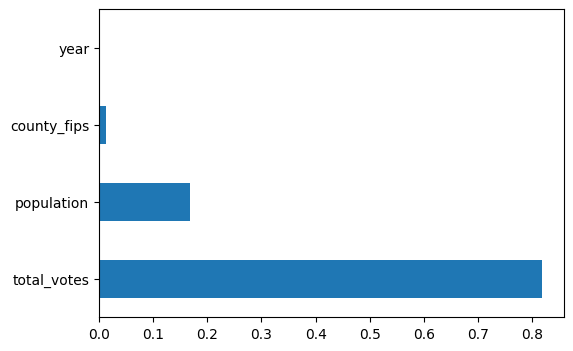

In [42]:
importance = pd.Series(model.feature_importances_,
                       index = X_train.columns.values)
importance.nlargest(5).plot(kind='barh',
                            figsize = (6,4));

In [43]:
predicted_values = pd.DataFrame({'democrat_votes': model_predict[:, 0], 'republican_votes': model_predict[:, 1]})
predicted_values

,democrat_votes,republican_votes
0,5045.24,11315.89
1,24163.08,39109.45
2,2246.56,5883.22
3,2334.48,5509.55
4,5258.19,11157.48
...,...,...
128,17305.23,31141.52
129,108697.76,116321.81
130,2592.21,7877.32
131,2217.71,4536.17


In [44]:
predicted_values = pd.concat([predicted_values, virginia_counties.rename("va_counties")], axis=1)
predicted_values = pd.concat([predicted_values, va_data_2020['county_fips'].rename("county_fips")], axis=1)
predicted_values

,democrat_votes,republican_votes,va_counties,county_fips
0,5045.24,11315.89,ACCOMACK,51001
1,24163.08,39109.45,ALBEMARLE,51003
2,2246.56,5883.22,ALLEGHANY,51005
3,2334.48,5509.55,AMELIA,51007
4,5258.19,11157.48,AMHERST,51009
...,...,...,...,...
128,17305.23,31141.52,SUFFOLK CITY,51800
129,108697.76,116321.81,VIRGINIA BEACH CITY,51810
130,2592.21,7877.32,WAYNESBORO CITY,51820
131,2217.71,4536.17,WILLIAMSBURG CITY,51830


In [67]:
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load data
gdf = gpd.read_file('data/VirginiaAdministrativeBoundary_ClippedToShoreline.shp/VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
vdf = pd.read_csv('./data/voting_VA.csv') # Load historical voting data
cdf = pd.read_csv('./data/county_adjacencies.csv') # Load county adjacency data and population data

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS']) 
df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf

In [68]:
votes = predicted_values.loc[:, ['democrat_votes', 'republican_votes', 'county_fips']]
df = df.rename(columns={"FIPS_left": "county_fips"})
df = pd.merge(df, votes, on='county_fips')
df = df.rename(columns={"democrat_votes": "dem_votes_2020", "republican_votes": "rep_votes_2020"})

<Axes: >

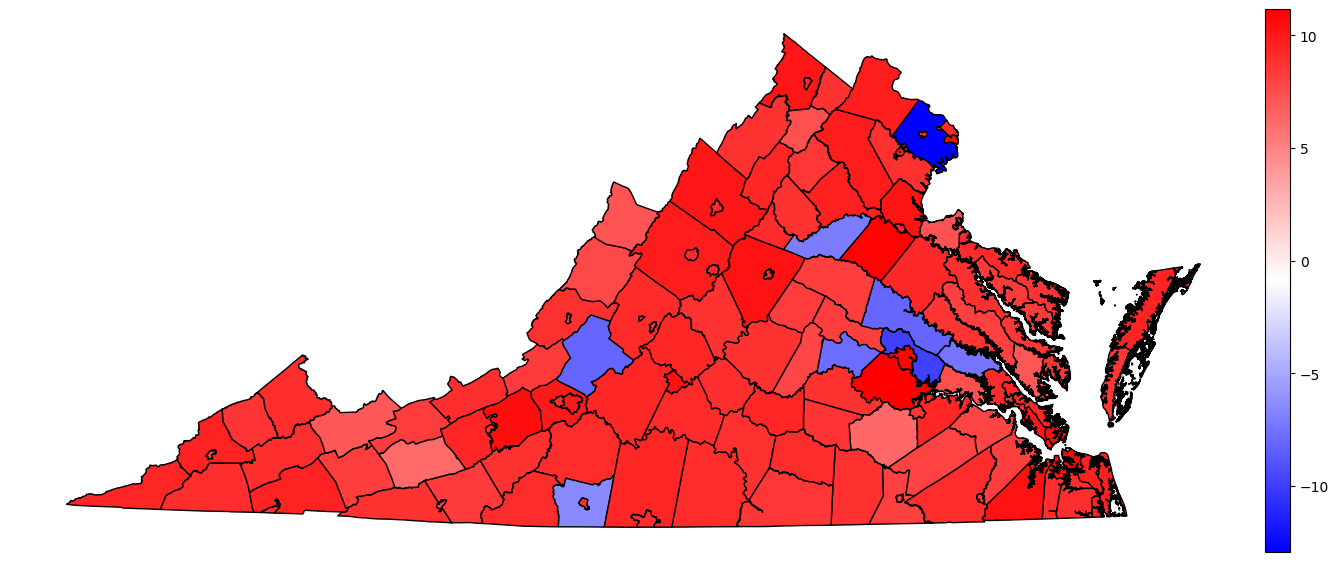

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

df['vote_diff'] = df['rep_votes_2020']-df['dem_votes_2020']
df['vote_diff_ihs'] = np.arcsinh(df['vote_diff'])
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')

In [70]:
# Load data
gdf = gpd.read_file('data/VirginiaAdministrativeBoundary_ClippedToShoreline.shp/VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
vdf = pd.read_csv('./data/voting_VA.csv') # Load historical voting data
cdf = pd.read_csv('./data/county_adjacencies.csv') # Load county adjacency data and population data

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS']) 
df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf

In [71]:
df20 = vdf.loc[ vdf['year']==2020,:] # Only the 2020 data

Dvotes = df20.loc[(df20['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2020')
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

Rvotes = df20.loc[(df20['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2020')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

<Axes: >

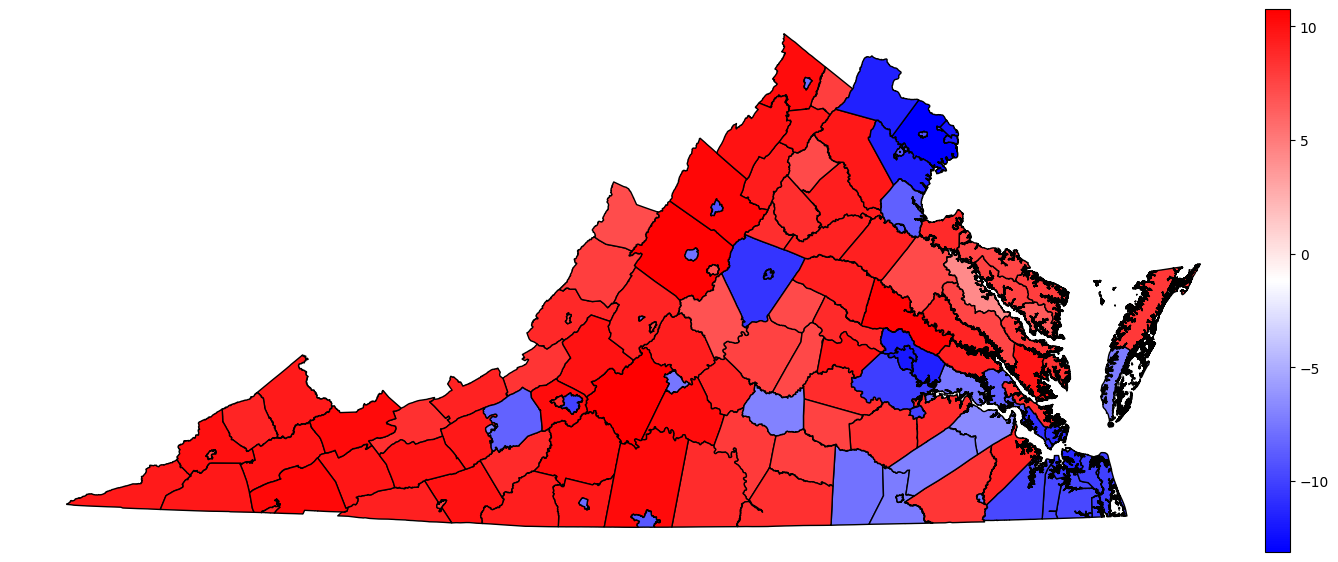

In [73]:
df['vote_diff'] = df['rep_votes_2020']-df['dem_votes_2020']
df['vote_diff_ihs'] = np.arcsinh(df['vote_diff'])

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')